## 1. Import libraries and packages

In this assignment, I will use very common and handy libraries and packages like **numpy, Pandas, Scikit-learn, Keras,** and **XGBoost** for prepare data and create the ML models. I will also use **Seaborn** and **Matpolotlib** to visualize summary statistics and results in different steps.

In [1]:
# import libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from keras import models, layers, regularizers, wrappers
from keras.wrappers.scikit_learn import KerasClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier


%matplotlib inline

## 2. Looking to the train and test sets

As it was said, the dataset split into two sets; train and test set that was provided by Kaggle.

Train set is used to predict model on data and the test set is used to evaluate the predictive model.

In [2]:
# import train set
train = pd.read_csv(r'D:\Western University\A-term\Advanced Machine Learning\Assignment\1\Dataset\train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv(r'D:\Western University\A-term\Advanced Machine Learning\Assignment\1\Dataset\test.csv').set_index('PassengerId')
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Below is a brief information about each columns of the dataset:

**1. PassengerId:** An unique index for passenger rows. It starts from 1 for first row and increments by 1 for every new rows.

**2. Survived:** Shows if the passenger survived or not. 1 stands for survived and 0 stands for not survived.

**3. Pclass:** Ticket class. 1 stands for First class ticket. 2 stands for Second class ticket. 3 stands for Third class ticket.

**4. Name:** Passenger's name. Name also contain title. "Mr" for man. "Mrs" for woman. "Miss" for girl. "Master" for boy.

**5. Sex:** Passenger's sex. It's either Male or Female.

**6. Age:** Passenger's age.

**7. SibSp:** Number of siblings or spouses travelling with each passenger.

**8. Parch:** Number of parents of children travelling with each passenger.

**9. Ticket:** Ticket number.

**10. Fare:** How much money the passenger has paid for the travel journey.

**11. Cabin:** Cabin number of the passenger. *"NaN"* values in this column indicates that the cabin number of that particular passenger has not been recorded.

In [4]:
# a quick discription of datasets
train.info()
print('_'*45)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
_____________________________________________
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass 

We can see from the tables that Age feature has some missing for many rows. Missing values in this column indicates that the age of that particular passenger has not been recorded.
Similarly, Cabin values are also missing in many rows.

In [5]:
print(train.isnull().sum())
print('_'*45, '\n')
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
_____________________________________________ 

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64


There are 177 rows with missing *Age*, 687 rows with missing *Cabin* and 2 rows with missing *Embarked* from train set.

Likewise, There are 86 rows with missing *Age*, 327 rows with missing *Cabin* and 1 row with missing *Fare* from test set.

### Total rows and columns

We can see that there are 891 rows and 12 columns in our training dataset.

In [6]:
print(f"train set shape: {train.shape}")

train set shape: (891, 12)


### Describing training dataset

describe() method can show different values like count, mean, standard deviation, etc. of numeric data types

In [7]:
# train description
train.describe().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [8]:
# test description
test.describe().round(2)

,Pclass,Age,SibSp,Parch,Fare
count,418.00,332.00,418.00,418.00,417.00
mean,2.27,30.27,0.45,0.39,35.63
std,0.84,14.18,0.90,0.98,55.91
min,1.00,0.17,0.00,0.00,0.00
25%,1.00,21.00,0.00,0.00,7.90
50%,3.00,27.00,0.00,0.00,14.45
75%,3.00,39.00,1.00,0.00,31.50
max,3.00,76.00,8.00,9.00,512.33


Following will show the descriptive statistics of object data types.

In [9]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Williams, Mr. Leslie",male,347082,G6,S
freq,1,577,7,4,644


In [10]:
test.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Drapkin, Miss. Jennie",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


This presents that there are duplicate Ticket number and Cabins number. The highest number of duplicate ticket number is "CA. 2343". It has been repeated 7 times. Similarly, the highest number of people using the same cabin is 4.

We also see that 644 people were embarked from port "S" in training set.

Among 891 rows, 577 were Male and the rest were Female.

### Relationship between Features and target variable (Survival)
We will analyze relationship between different features with respect to Survival on the **train set**. We see how different feature values show different survival chance. We also plot different kinds of diagrams to visualize our data and findings.

In total, 38.4% of passengers survived(value of 1) while 61.6% died(value of 0) in train set.

In [11]:
train.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

#### Pclass vs. Survival
Higher class passengers have better survival chance.

In [12]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [13]:
train.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

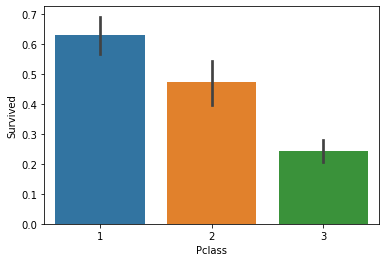

In [14]:
sns.barplot(x='Pclass', y='Survived', data=train)

#### Sex vs. Survival
Females had better survival chance.

In [15]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [16]:
train.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

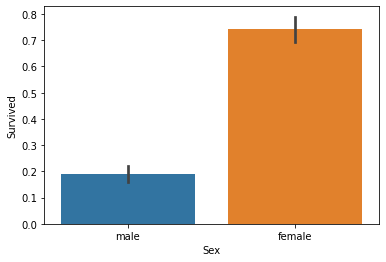

In [17]:
sns.barplot(x='Sex', y='Survived', data=train)

#### Embarked vs. Survival
People who are in C category had better survival chance

In [18]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
train.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

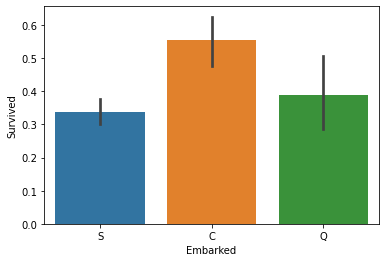

In [20]:
sns.barplot(x='Embarked', y='Survived', data=train)

#### Pclass, Sex & Embarked vs. Survival

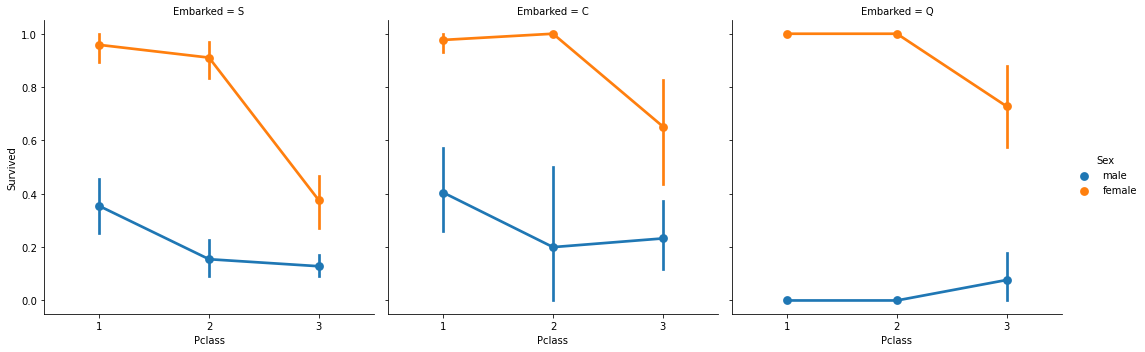

In [21]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=train, kind='point')

From the above plot, it can be seen that:

- Almost all females from Pclass 1 and 2 survived.
- Females dying were mostly from 3rd Pclass.
- Males from Pclass 1 only have slightly higher survival chance than Pclass 2 and 3.

#### Parch vs. Survival

In [22]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [23]:
train.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

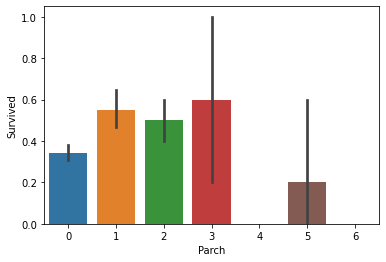

In [24]:
sns.barplot(x='Parch', y='Survived', data=train)

#### SibSp vs. Survival

In [25]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [26]:
train.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

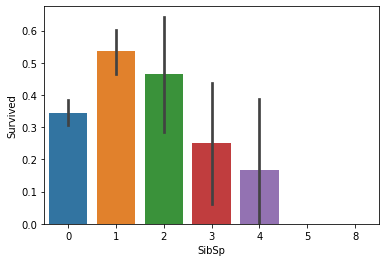

In [27]:
sns.barplot(x='SibSp', y='Survived', data=train)

#### Age vs. Survival

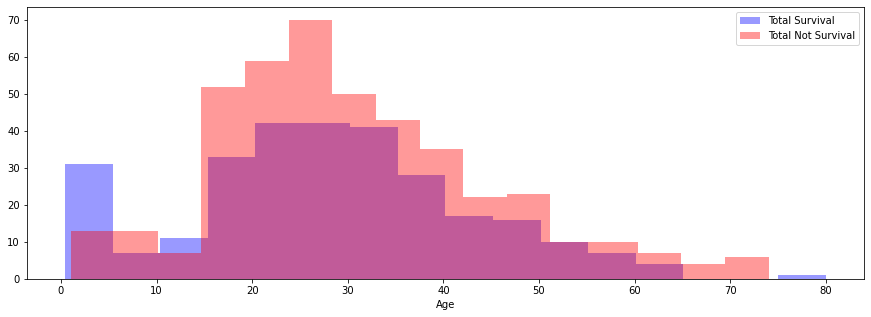

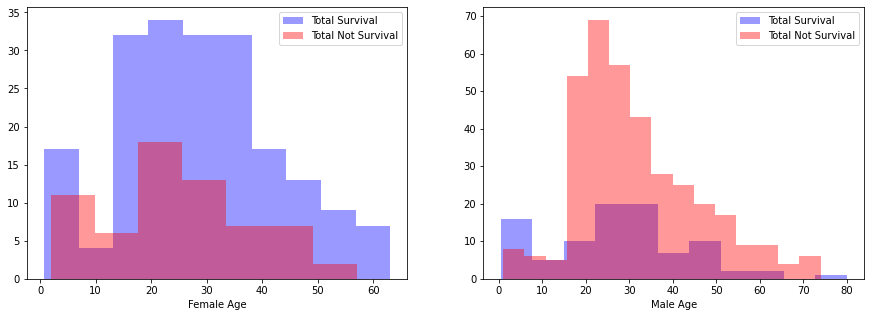

In [28]:
total_survived = train[train['Survived']==1]
total_not_survived = train[train['Survived']==0]
male_survived = train[(train['Survived']==1) & (train['Sex']=="male")]
female_survived = train[(train['Survived']==1) & (train['Sex']=="female")]
male_not_survived = train[(train['Survived']==0) & (train['Sex']=="male")]
female_not_survived = train[(train['Survived']==0) & (train['Sex']=="female")]

plt.figure(figsize=[15,5])
plt.subplot(111)
sns.distplot(total_survived['Age'].dropna().values, kde=False, color='blue')
sns.distplot(total_not_survived['Age'].dropna().values, kde=False, color='red', axlabel='Age')
plt.legend(['Total Survival', 'Total Not Survival'])
plt.figure(figsize=[15,5])

plt.subplot(121)
sns.distplot(female_survived['Age'].dropna().values, kde=False, color='blue')
sns.distplot(female_not_survived['Age'].dropna().values, kde=False, color='red', axlabel='Female Age')
plt.legend(['Total Survival', 'Total Not Survival'])

plt.subplot(122)
sns.distplot(male_survived['Age'].dropna().values, kde=False, color='blue')
sns.distplot(male_not_survived['Age'].dropna().values, kde=False, color='red', axlabel='Male Age')
plt.legend(['Total Survival', 'Total Not Survival'])

As can be seen:

- From Combining male and female data, children with age between <u>0 to 5</u> have more chance for survival.
- <u>*Females*</u> with age between <u>18 to 40</u> and <u>50 and above</u> have higher chance of survival.
- <u>*Males*</u> with age between <u>0 to 14</u> have better chance of survival.

#### Correlations between the features
In this case, we focus on the features that have strong positive or negative correlation with the Survived feature.

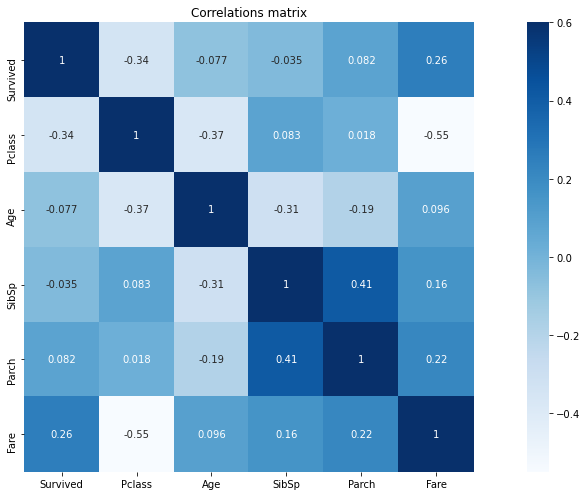

In [29]:
plt.figure(figsize=(15,7))
sns.heatmap(train.drop('PassengerId',axis=1).corr(), vmax=0.6, square=True, annot=True, cmap='Blues')
plt.title('Correlations matrix')
plt.tight_layout()

## 3. Prepare data for modelling

### 3.1 Feaure engineering

I will define a function to replace *NaN* values with mode value for some features. Then, a function will be define to convert NaN values to **Unknown**. One more function will be defied to convert categorical variables to numerics.

In [30]:
# Define function to do so
def impute_nan_most_frequent_category(DataFrame, ColName):
    # .mode()[0] - gives first category name
    most_frequent_category=DataFrame[ColName].mode()[0]
    
    # replace nan values with most occured category
    DataFrame[ColName + "_Imputed"] = DataFrame[ColName]
    DataFrame[ColName + "_Imputed"].fillna(most_frequent_category,inplace=True)

In [31]:
# Convert NaN as a category
def convert_nan_to_category(DataFrame, ColName):
    DataFrame[ColName] = np.where(DataFrame[ColName].isnull(), "Unknown", DataFrame[ColName])

In [32]:
# Encoding Categorical Values
def cat_to_num(DataFrame, ImputedCol):
    DataFrame[ImputedCol] = DataFrame[ImputedCol].astype('category')
    DataFrame[ImputedCol + "_Encoded"] = DataFrame[ImputedCol].cat.codes

#### Embarked feature
Embarked feature has some *NaN* value that should be imputed. We saw that category "S" has maximum passengers in previous section. Hence, I replace *NaN* values with "S" by defined function ( impute_nan_most_frequent_category ).

In [33]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [34]:
# Replace Embared columns with most frequency values
impute_nan_most_frequent_category(train, "Embarked")

 Then, it should be encoded into numerics by defined function ( cat_to_num ).

In [35]:
# Encoded into the numerics
cat_to_num(train, 'Embarked_Imputed')

#### Cabin feature
Cabin feature has some *NaN* that should be known as "Unknown". This is, some passengers has no cabin. They are grouped as **Unknown** by the defined function ( convert_nan_to_category ).

In [36]:
# Replace NaN with Unknown
convert_nan_to_category(train, 'Cabin')

Next, a new column is created for writing the categorical value from Cabin. Then, the feature should be encoded into numerics by defined function ( cat_to_num )

In [37]:
# New column for making the categorical value from Cabin
train['Cabin_Cat'] = np.zeros((train.Cabin.shape[0]))

for i in range(train.Cabin.shape[0]):
    train.Cabin_Cat[i] = train['Cabin'][i][0]

<ipython-input-37-3ae025c2e5ba>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.Cabin_Cat[i] = train['Cabin'][i][0]
C:\Users\mosta\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [38]:
# Encoded into the numerics
cat_to_num(train, 'Cabin_Cat')

#### Sex features
This feature will be converted into numerics by defined function ( cat_to_num ).

In [39]:
# Encoded into the numerics
cat_to_num(train, 'Sex')

#### SibSp and Parch Feature
Let's create a new feature named **Family_Size**. This feature is used to check how is the survival chance while travelling alone as compared to travelling with number of families

In [40]:
# Linear combinations of family size
train['Family_Size'] = train['SibSp'] + train['Parch']

In [41]:
train[['Family_Size', 'Survived']].groupby(['Family_Size'], as_index=False).mean()

,Family_Size,Survived
0,0,0.303538
1,1,0.552795
2,2,0.578431
3,3,0.724138
4,4,0.200000
5,5,0.136364
6,6,0.333333
7,7,0.000000
8,10,0.000000


The result shows that:

- Having FamilySize upto 4 (from 2 to 4) had better survival chance.
- FamilySize = 1, i.e. travelling alone had less survival chance.
- Large FamilySize (size of 5 and above) also had less survival chance.

Hence, I will create a new feature named **Alone**. This feature is used to check whether there is a chance to survive when you are alone or not.

This represents that the passengers who travelled alone had 55.2% survival chance.

In [42]:
for dataset in [train]:
    dataset['Alone'] = 0
    dataset.loc[dataset['Family_Size'] == 1, 'Alone'] = 1
    
print (train[['Alone', 'Survived']].groupby(['Alone'], as_index=False).mean())

   Alone  Survived
0      0  0.346575
1      1  0.552795


#### Name Feature
I will extract titles from Name column. I will add a new column named **Title** in the Train and test dataset with the Title present in the particular passenger name. I will also replace some less common titles with the name "Other".

In [43]:
# Extract Title from the Name feature
train_test_data = [train, test]
for dataset in train_test_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.')

for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')


 After that, I will convert the categorical Title values into numerics form on the train set.

In [44]:
cat_to_num(train, 'Title')

I will drop the useless features till now.

In [45]:
cleaned_train = train.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Embarked_Imputed', 'Cabin_Cat', 'SibSp', 'Parch', 'Title', 'Family_Size'], axis = 'columns')

cleaned_train.head()

,Survived,Pclass,Age,Fare,Embarked_Imputed_Encoded,Cabin_Cat_Encoded,Sex_Encoded,Alone,Title_Encoded
0,0,3,22.0,7.2500,2,8,1,1,2
1,1,1,38.0,71.2833,0,2,0,1,3
2,1,3,26.0,7.9250,2,8,0,0,1
3,1,1,35.0,53.1000,2,2,0,1,3
4,0,3,35.0,8.0500,2,8,1,0,2


#### Age feature
As I said before, *Age* value is missing for 177 observations. In this part, I will use the **KNN algorithm** to predict the missing age for the passengers whose ages are missed. Each missing value will be determined by the nearest passengers.

I also use the GridsearchCV method to find the best the **K** for the algorithm to predict the missing value precisely. The possible Ks are recommended to the GridsearchCV method from 2 to 12. Each time this method examines one of them for 8 times and record the accuracy score to find the optimum K among the possible K.

In [46]:
# Define X and y for train set
features = cleaned_train.drop('Survived', axis = 'columns')
target = cleaned_train.Survived

In [47]:
# Predict missing value of Age
feature_withoutAge = features.dropna().drop(['Age'], axis='columns')
target_Age = features.dropna()['Age'].astype('int')
test_toPredict_Age = features[features['Age'].isna()].drop(['Age'], axis='columns')

# Grid search cross-validation to find the best number of nabours
search_space = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}
classifier = GridSearchCV(KNeighborsClassifier(),param_grid=search_space, cv=8).fit(feature_withoutAge, target_Age)

nn = KNeighborsClassifier(n_neighbors=classifier.best_estimator_.get_params()['n_neighbors'])
nn.fit(feature_withoutAge, target_Age)
missed_Age_val = nn.predict(test_toPredict_Age)

ind_missingValues = features[features['Age'].isna()].index
test_toPredict_Age['Age'] = missed_Age_val

# Put the predicted Age value to the feature set
j=0
for i in ind_missingValues:
    features['Age'][i] = missed_Age_val[j]
    j=j+1


C:\Users\mosta\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(("The least populated class in y has only %d"
<ipython-input-47-514a60aa3b7c>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Age'][i] = missed_Age_val[j]


Now, we will map Age according to AgeBand. In fact, 5 categories will be defined to convert Age feature to categorical.

In [48]:
features['AgeBand'] = pd.cut(features['Age'], 5)

# Map Age according to AgeBand
for dataset in [features]:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

# Drop AgeBound
features = features.drop(['AgeBand'], axis = 'columns')

#### Fare feature
I will replace missing Fare values with the median of Fare.

In [49]:
for dataset in [features]:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())

Then, I will create FareBand. The Fare will be divided into 4 categories range. After that, I will map Fare according to FareBand

In [50]:
features['FareBand'] = pd.qcut(features['Fare'], 4)

# Map Fare according to FareBand
for dataset in [features]:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [51]:
features = features.drop(['FareBand'], axis = 'columns')

### 3.2 Feature Selection
All data in the train set,which is used in features set, converted to categorical features. From an interpretability standpoint, it is better NOT to standardize categorical features. That way, the meaning of a coefficient is the change in prediction that occurs when a categorical feature changes from a 0 to a 1.

I just consider some interaction between some inportant features.

In [52]:
# some important interactions between features
features['Age_Pclass'] = features['Age']*features['Pclass']
features['Fare_Cabin'] = features['Fare']*features['Cabin_Cat_Encoded']
features['Pcl_Cabin'] = features['Pclass']*features['Cabin_Cat_Encoded']
features['Title_Cabin'] = features['Title_Encoded']*features['Cabin_Cat_Encoded']
features['Pcl_Embarked'] = features['Pclass']*features['Embarked_Imputed_Encoded']

Now, features and target variables are ready to use in the models.

In [53]:
print(f'features shape: {features.shape}')
features.head()

features shape: (891, 13)


,Pclass,Age,Fare,Embarked_Imputed_Encoded,Cabin_Cat_Encoded,Sex_Encoded,Alone,Title_Encoded,Age_Pclass,Fare_Cabin,Pcl_Cabin,Title_Cabin,Pcl_Embarked
0,3,1.0,0,2,8,1,1,2,3.0,0,24,16,6
1,1,2.0,3,0,2,0,1,3,2.0,6,2,6,0
2,3,1.0,1,2,8,0,0,1,3.0,8,24,8,6
3,1,2.0,3,2,2,0,1,3,2.0,6,2,6,2
4,3,2.0,1,2,8,1,0,2,6.0,8,24,16,6


## 4. Predictive modelling
### 4.1 Predictive Models and Model Evaluation
Three classification algorithms are rcommended in this assignment. Other algorithms will be used to find the precise predictive model for the train set:

- Naive Bayes (GaussianNB)
- Decision Tree
- Perceptron (Multi-Layer Perceptron)
- Logistic Regression
- Random Forest
- XGBoost



Here's the training procedure:

First, I train these classifiers with the training data.

Then, I calculate the accuracy score of the trained classifier by means of the k-fold cross-validation.

**Please note:** that the accuracy score is generated based on our training dataset. I also use 8-fold for the cross-validation method.

### Naive Bayes (GaussianNB)
[GaussianNB](https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes) implements the Gaussian Naive Bayes algorithm for classification. The likelihood of the features is assumed to be Gaussian.

In [54]:
# Naive Bayesian classifier
NBG = GaussianNB()
NBG_fit = NBG.fit(features, target)

In [55]:
# Cross-Validation
cv_score_NBG = cross_val_score(NBG, features, target, cv=8).mean()
print(f'Cross-Validation Score for GaussianNB: {cv_score_NBG}')

Cross-Validation Score for GaussianNB: 0.730815637065637


### Decision Tree Classifier
[Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier) is a type of Supervised Machine Learning where the data is continuously split according to a certain parameter.

I used GridsearchSV method to find the best-tuned parameters for the model.

In [56]:
# Fine-tune the model by GridsearchCV method

# parameters and possible values
param_grid = ({
    'max_depth': [2, 3, 4],
    'max_leaf_nodes': range(2, 9),
    'min_samples_split' : [2, 3, 4]
})

# Gridsearch model on Decision Tree Classifier
TreeGrid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=8)
TreeGrid.fit(features, target)

# Best parameters
TreeGrid.best_params_

{'max_depth': 3, 'max_leaf_nodes': 5, 'min_samples_split': 2}

In [57]:
# Decision Tree Classifier
DT = DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5, min_samples_split=2)
DT.fit(features, target)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5)

In [58]:
# Cross-Validation
cv_score_DT = cross_val_score(DT, features, target, cv=8).mean()
print(f'Cross-Validation Score for DecisionTreeClassifier: {cv_score_DT}')

Cross-Validation Score for DecisionTreeClassifier: 0.8058538449163449


### Multi-Layer Perceptron
A [multilayer perceptron (MLP)](https://scikit-learn.org/stable/modules/neural_networks_supervised.html#multi-layer-perceptron) is a class of feedforward artificial neural network. A MLP consists of at least three layers of nodes: an input layer, a hidden layer and an output layer.— MLP Wikipedia

Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.
#### by scikit-learn

In [59]:
# Fine-tune the model by GridsearchCV method

# parameters and possible values
param_grid = ({
    'hidden_layer_sizes': [(50,), (50,50,), (100,), (100,100,)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver' : ['lbfgs', 'sgd', 'adam'],
    'max_iter' : [100, 200, 300]
})

# Gridsearch model on multi-layer perceptron Classifier
MLPGrid = GridSearchCV(estimator=MLPClassifier(), param_grid=param_grid, cv=8, n_jobs = -1)
MLPGrid.fit(features, target)

# Best parameters
MLPGrid.best_params_

C:\Users\mosta\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


{'activation': 'logistic',
 'hidden_layer_sizes': (100, 100),
 'max_iter': 100,
 'solver': 'adam'}

In [60]:
# MLP Classifier
mlpc = MLPClassifier(hidden_layer_sizes = MLPGrid.best_params_['hidden_layer_sizes'],
                     activation = MLPGrid.best_params_['activation'],
                     solver = MLPGrid.best_params_['solver'],
                     max_iter = MLPGrid.best_params_['max_iter'])
mlpc.fit(features, target)

C:\Users\mosta\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100),
              max_iter=100)

In [61]:
# Cross-Validation
cv_score_mlp = cross_val_score(mlpc, features, target, cv=8).mean()
print(f'Cross-Validation Score for MLPClassifier: {cv_score_mlp}')

C:\Users\mosta\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mosta\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mosta\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mosta\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mosta\anaconda3\lib\site-packages\sklearn\neural_network\_multi

Cross-Validation Score for MLPClassifier: 0.81598898005148


C:\Users\mosta\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


#### by Keras
I decide to define wight regularization for the network. It allows me to apply penalties on layer parameters or layer activity during optimization and prevent overfitting. These penalties are summed into the loss function that the network optimizes.

In [62]:
# Fine-tune the model by GridsearchCV method

# define a Network by Keras
def create_network(optimizer):
    # Layer weight regularizers
    kernel_regularizer = regularizers.l1(0.01) # L1 regularization penalty
    kernel_regularizer = regularizers.l2(0.01) # L2 regularization penalty
    kernel_regularizer = regularizers.l1_l2(l1 = 0.01, l2 = 0.01) #  both L1 and L2 penalties
    
    Network = models.Sequential()
    Network.add(layers.Dense(units=100, activation='relu', kernel_regularizer = kernel_regularizer, input_shape=(13,)))
    Network.add(layers.Dense(units=100, activation='relu', kernel_regularizer = kernel_regularizer))
    Network.add(layers.Dense(units=1 , activation='sigmoid'))
    Network.compile(optimizer = optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return Network

ANN = KerasClassifier(build_fn = create_network)


# parameters and possible values
param_grid = [{
    'epochs' : [10, 12, 15, 20],
    'optimizer' : ['rmsprop','adam', 'adamax', 'nadam'],
    'batch_size' : [100, 150, 200],
}]

# Gridsearch model on MLP Classifier
MLPKGrid = GridSearchCV(estimator = ANN, param_grid = param_grid, cv=8, n_jobs=-1)
MLPKGrid.fit(features, target)

Epoch 1/20
5/5 [==============================] - 0s 1ms/step - loss: 12.0367 - accuracy: 0.6105
Epoch 2/20
5/5 [==============================] - 0s 997us/step - loss: 11.3966 - accuracy: 0.6835
Epoch 3/20
5/5 [==============================] - 0s 798us/step - loss: 10.8763 - accuracy: 0.6801
Epoch 4/20
5/5 [==============================] - 0s 798us/step - loss: 10.3415 - accuracy: 0.6880
Epoch 5/20
5/5 [==============================] - 0s 997us/step - loss: 9.8278 - accuracy: 0.6981
Epoch 6/20
5/5 [==============================] - 0s 997us/step - loss: 9.3320 - accuracy: 0.6992
Epoch 7/20
5/5 [==============================] - 0s 997us/step - loss: 8.8560 - accuracy: 0.7037
Epoch 8/20
5/5 [==============================] - 0s 997us/step - loss: 8.3979 - accuracy: 0.6958
Epoch 9/20
5/5 [==============================] - 0s 798us/step - loss: 7.9463 - accuracy: 0.7149
Epoch 10/20
5/5 [==============================] - 0s 997us/step - loss: 7.5137 - accuracy: 0.7138
Epoch 11/20
5/5 [

GridSearchCV(cv=8,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000002A5BCE85E50>,
             n_jobs=-1,
             param_grid=[{'batch_size': [100, 150, 200],
                          'epochs': [10, 12, 15, 20],
                          'optimizer': ['rmsprop', 'adam', 'adamax', 'nadam']}])

In [63]:
# best parameters
MLPKGrid.best_params_

{'batch_size': 200, 'epochs': 20, 'optimizer': 'adam'}

In [64]:
# Weight regularization to avoid "Overfitting"
kernel_regularizer = regularizers.l1(0.01)
kernel_regularizer = regularizers.l2(0.01)
kernel_regularizer = regularizers.l1_l2(l1 = 0.01, l2 = 0.01)

# Define a network
Network = models.Sequential()
Network.add(layers.Dense(units=100, activation='relu',  kernel_regularizer = kernel_regularizer, input_shape=(features.shape[1],)))
Network.add(layers.Dense(units=100, activation='relu',  kernel_regularizer = kernel_regularizer))
Network.add(layers.Dense(units=1 , activation='sigmoid'))
Network.compile(optimizer = MLPKGrid.best_params_['optimizer'], loss='binary_crossentropy', metrics=['accuracy'])
Network.fit(features, target, batch_size=MLPKGrid.best_params_['batch_size'], epochs=MLPKGrid.best_params_['epochs'])

Epoch 1/20
5/5 [==============================] - 0s 998us/step - loss: 11.9094 - accuracy: 0.5679
Epoch 2/20
5/5 [==============================] - 0s 798us/step - loss: 11.3179 - accuracy: 0.6274
Epoch 3/20
5/5 [==============================] - 0s 798us/step - loss: 10.7764 - accuracy: 0.6756
Epoch 4/20
5/5 [==============================] - 0s 798us/step - loss: 10.2423 - accuracy: 0.6813
Epoch 5/20
5/5 [==============================] - 0s 599us/step - loss: 9.7384 - accuracy: 0.6891
Epoch 6/20
5/5 [==============================] - 0s 798us/step - loss: 9.2470 - accuracy: 0.7048
Epoch 7/20
5/5 [==============================] - 0s 798us/step - loss: 8.7641 - accuracy: 0.6958
Epoch 8/20
5/5 [==============================] - 0s 798us/step - loss: 8.2969 - accuracy: 0.6958
Epoch 9/20
5/5 [==============================] - 0s 798us/step - loss: 7.8628 - accuracy: 0.7284
Epoch 10/20
5/5 [==============================] - 0s 798us/step - loss: 7.4354 - accuracy: 0.6958
Epoch 11/20
5/5

As we can see from the summary, this net is constructed by 101 parameters in the first layer, 10100 parameters in the second layer, and 1400 parameters in the third layer. In total, 11,601 parameters are involved in it.

In [65]:
Network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               1400      
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 11,601
Trainable params: 11,601
Non-trainable params: 0
_________________________________________________________________


Accuracy of the model is as follows:

In [66]:
mlp_k = Network.history.history['accuracy'][MLPKGrid.best_params_['epochs']-1]
print(f'Accuracy score for the model: {mlp_k}')

Accuracy score for the model: 0.7048260569572449


### Logistic Regression
[Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression#cite_note-1) is a statistical model that in its basic form uses a logistic function to model a binary dependent variable. Logistic regression is estimating the parameters of a logistic model (a form of binary regression).

In this algorithm, max_iter is a parameters which is defined as the maximum number of iterations taken for the solvers to converge. I will set the max_iter parameter to 1000 because if I put the default value for it, it may not be converaged.

In addition, the default penalty for this algorithm is l2. In this case, if I remove the penalty, the result would be the same.

In [67]:
lgreg = LogisticRegression(penalty='none', max_iter=1000)
lgreg.fit(features, target)

LogisticRegression(max_iter=1000, penalty='none')

In [68]:
# Cross-Validation
cv_score_lgreg = cross_val_score(lgreg, features, target, cv=8).mean()
print(f'Cross-Validation Score for Logistic Regression Classifier: {cv_score_lgreg}')

Cross-Validation Score for Logistic Regression Classifier: 0.7800032175032174


### Bootstrap Aggregating or Bagging
Bootstrap aggregating, also called [Bagging](https://en.wikipedia.org/wiki/Bootstrap_aggregating) is a technique of building many decision trees at a time by randomly sampling with replacement, or bootstrapping, from the original dataset. This ensures variety in the trees, which helps to reduce variance and to avoid overfitting.

I will create this algorithm based on the Decision Trees with the same parametes that was created previously.

In [69]:
bag = BaggingClassifier(DT, n_estimators=100)
bag.fit(features, target)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                        max_leaf_nodes=5),
                  n_estimators=100)

In [70]:
# Cross-Validation
cv_score_bag = cross_val_score(bag, features, target, cv=8).mean()
print(f'Cross-Validation Score for Bagging Classifier: {cv_score_bag}')

Cross-Validation Score for Bagging Classifier: 0.8014096685971686


### Random Forest
The [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) is an ensemble learning method consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.

In [71]:
rfc = RandomForestClassifier()
rfc.fit(features, target)

RandomForestClassifier()

In [72]:
# Cross-Validation
cv_score_rfc = cross_val_score(rfc, features, target, cv=8).mean()
print(f'Cross-Validation Score for Random Forest Classifier: {cv_score_rfc}')

Cross-Validation Score for Random Forest Classifier: 0.8048282657657657


### XGBoost
**Boosting** is a sequential technique which works on the principle of an ensemble. It combines a set of weak learners and delivers improved prediction accuracy.

[***XGBoost*** (Extreme Gradient Boosting)](https://en.wikipedia.org/wiki/XGBoost) belongs to a family of boosting algorithms and uses the gradient boosting (GBM) framework at its core. It is an optimized distributed gradient boosting.

In [73]:
# Fine-tune the model by GridsearchCV method

# parameters and possible values
param_grid = ({
    'colsample_bytree': [0.6, 0.7, 0.8],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth' : [2, 3, 4],
    'n_estimators' : [50, 100, 150],
    'subsample' : [0.6, 0.8]
})

# Gridsearch model on Decision Tree Classifier
XGBGrid = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, cv=8, n_jobs=-1)
XGBGrid.fit(features, target)

# Best parameters
XGBGrid.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 100,
 'subsample': 0.8}

In [74]:
xgbc = XGBClassifier(colsample_bytree = XGBGrid.best_params_['colsample_bytree'],
                     learning_rate = XGBGrid.best_params_['learning_rate'],
                     max_depth = XGBGrid.best_params_['max_depth'],
                     n_estimators = XGBGrid.best_params_['n_estimators'],
                     subsample = XGBGrid.best_params_['subsample'])
xgbc.fit(features, target)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [75]:
# Cross-Validation
cv_score_xgb = cross_val_score(xgbc, features, target, cv=8).mean()
print(f'Cross-Validation Score for XGBClassifier: {cv_score_xgb}')

Cross-Validation Score for XGBClassifier: 0.8305984555984556


The bar chart shows the important features in XGBoost model. As we can see, interaction between some features are playing an important role in the model.

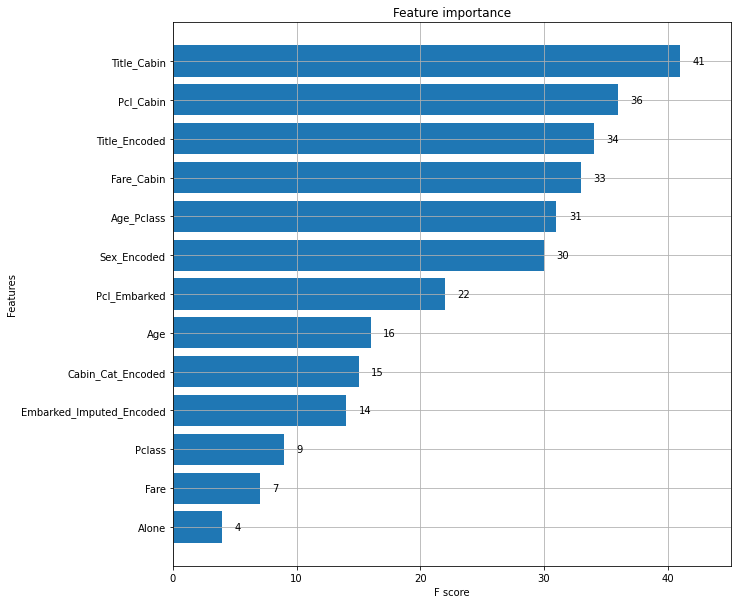

In [76]:
# importance features
fig,ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(xgbc, ax=ax, height=0.8)

### 4.2 Model selection, based on the accuracy
I will compare the accuracy score of all the classifier models used above to determine the best model for the competition

In [77]:
predictive_models = pd.DataFrame({
    'Model': ['Naive Bayes', 'Decision Tree', 'Perceptron by Scikit-Learn',
              'Perceptron by Keras', 'Logistic Regression', 'Bagging', 'Random Forest', 'XGBoost'],
    
    'Score': [cv_score_NBG, cv_score_DT, cv_score_mlp,
             mlp_k, cv_score_lgreg, cv_score_bag, cv_score_rfc, cv_score_xgb]
    })

predictive_models.sort_values(by='Score', ascending=False).reset_index(drop=True)

,Model,Score
0,XGBoost,0.830598
1,Perceptron by Scikit-Learn,0.815989
2,Decision Tree,0.805854
3,Random Forest,0.804828
4,Bagging,0.801410
5,Logistic Regression,0.780003
6,Naive Bayes,0.730816
7,Perceptron by Keras,0.704826


From the above table, I created 8 models and estimate the general error for each one. As I see, trees-based models are fitted well with the train data. we can see that XGBoost has the highest accuracy score.

So, I choose XGBoost classifier as it has the ability to limit overfitting as well.

In addition, MLP by Keras woud not be good for this dataset because it can work perfectly on the large datasets.

## 5. Get the test set (Preparation)

In this part, I will manipulate the test set and prepare it for the prediction.

In [78]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


Like to train set, all features in test set should be cleaned and manipulated.

In [79]:
# Cabin column has some NaN that should be known as "Unknown"
convert_nan_to_category(test, 'Cabin')

# New column for making the categorical value from Cabin
test['Cabin_Cat'] = np.zeros((test.Cabin.shape[0]))

for i in range(892, 1309):
    test.Cabin_Cat[i] = test['Cabin'][i][0]


# Replace Embared columns with most frequency values, if any
impute_nan_most_frequent_category(test, "Embarked")    

# Encoding categorical columns to numerics
# Embared column to numeric
cat_to_num(test, 'Embarked_Imputed')

# Cabin column to numeric
cat_to_num(test, 'Cabin_Cat')

# Sex column to numeric
cat_to_num(test, 'Sex')

# Linear combinations of family size
test['Family_Size'] = test['SibSp'] + test['Parch']

# Convert Family_Size to binary like the train set(Alone or not)
for dataset in [test]:
    dataset['Alone'] = 0
    dataset.loc[dataset['Family_Size'] == 1, 'Alone'] = 1


# Title column to numeric
cat_to_num(test, 'Title')
    

# drop the useless features
test = test.drop(['Name', 'Sex', 'SibSp', 'Parch', 'Title', 'Ticket', 'Cabin', 'Embarked', 'Embarked_Imputed', 'Cabin_Cat', 'Family_Size'], axis = 'columns')


<ipython-input-79-f227f150c8f6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.Cabin_Cat[i] = test['Cabin'][i][0]
C:\Users\mosta\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Find the nearst neighbors for *NaN* value in Age

In [80]:
# Test features
test_features = test.copy()


# Replace missing Age*Pclass value with nearest neighbors
test_features_withAge = test_features.dropna().drop(['Age'], axis='columns')
testtarget_withAge = test_features.dropna()['Age'].astype('int')
testtest_STD_Age = test_features[test_features['Age'].isna()].drop(['Age'], axis='columns')

nn = KNeighborsClassifier(n_neighbors=classifier.best_estimator_.get_params()['n_neighbors'])
nn.fit(test_features_withAge, testtarget_withAge)
missed_Age_val_test = nn.predict(testtest_STD_Age)

ind_missingValues_test = test_features[test_features['Age'].isna()].index
testtest_STD_Age['Age'] = missed_Age_val_test

# Put the predicted Age value to the features set
j=0
for i in ind_missingValues_test:
    test_features['Age'][i] = missed_Age_val_test[j]
    j=j+1

<ipython-input-80-e7902012d50c>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_features['Age'][i] = missed_Age_val_test[j]


As we know, Age is continus variable which should be Converted into the categorical.

In [81]:
test_features['AgeBand'] = pd.cut(test_features['Age'], 5)

# I map Age according to AgeBand
for dataset in [test_features]:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

# Drop AgeBound
test_features = test_features.drop(['AgeBand'], axis = 'columns')

Fare feature also has a *NaN* that should be fill out with the mean. Then, this will be converted to categories of 0 to 3.

In [82]:
# replace NaN in Fare features with mean value
test_features['Fare'].fillna(test_features['Fare'].mean(), inplace=True)

In [83]:
for dataset in [test_features]:
    dataset['Fare'] = dataset['Fare'].fillna(test_features['Fare'].median())


test_features['FareBand'] = pd.qcut(test_features['Fare'], 4)

# Map Fare according to FareBand
for dataset in [test_features]:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

# drop FareBand
test_features = test_features.drop(['FareBand'], axis = 'columns')

In [84]:
# some important interactions between test features
test_features['Age_Pclass'] = test_features['Age']*test_features['Pclass']
test_features['Fare_Cabin'] = test_features['Fare']*test_features['Cabin_Cat_Encoded']
test_features['Pcl_Cabin'] = test_features['Pclass']*test_features['Cabin_Cat_Encoded']
test_features['Title_Cabin'] = test_features['Title_Encoded']*test_features['Cabin_Cat_Encoded']
test_features['Pcl_Embarked'] = test_features['Pclass']*test_features['Embarked_Imputed_Encoded']

Finally, the cleaned test set is shown as follows:

It should be mentioned that feature_test is ready-to-use set which comes from the cleaned and manipulated test set. The feature_test has also the right shape for the created models. This set will be use to predict survived or died passenger by model(s).

In [85]:
print(f'feature_test shape: {test_features.shape}')
test_features.head()

feature_test shape: (418, 13)


,Pclass,Age,Fare,Embarked_Imputed_Encoded,Cabin_Cat_Encoded,Sex_Encoded,Alone,Title_Encoded,Age_Pclass,Fare_Cabin,Pcl_Cabin,Title_Cabin,Pcl_Embarked
PassengerId,,,,,,,,,,,,,
892,3,2.0,0,1,8,1,0,2,6.0,0,24,16,3
893,3,2.0,0,2,8,0,1,3,6.0,0,24,24,6
894,2,3.0,1,1,8,1,0,2,6.0,8,16,16,2
895,3,1.0,1,2,8,1,0,2,3.0,8,24,16,6
896,3,1.0,1,2,8,0,0,3,3.0,8,24,24,6


## 6. Create Submission File to Kaggle Competition
I will create the submisssion file by using the XGBoost model from the cleaned test set.

Finally, the best record is submitted to the submission part through Kaggle Titanic Competition.

Thank you!